# Lab 6

You are tasked with evaluating card counting strategies for black jack. In order to do so, you will use object oriented programming to create a playable casino style black jack game where a computer dealer plays against $n$ computer players and possibily one human player. If you don't know the rules of blackjack or card counting, please google it. 

A few requirements:
* The game should utilize multiple 52-card decks. Typically the game is played with 6 decks.
* Players should have chips.
* Dealer's actions are predefined by rules of the game (typically hit on 16). 
* The players should be aware of all shown cards so that they can count cards.
* Each player could have a different strategy.
* The system should allow you to play large numbers of games, study the outcomes, and compare average winnings per hand rate for different strategies.

1. Begin by creating a classes to represent cards and decks. The deck should support more than one 52-card set. The deck should allow you to shuffle and draw cards. Include a "plastic" card, placed randomly in the deck. Later, when the plastic card is dealt, shuffle the cards before the next deal.

In [14]:
import random

class Card:
    def __init__(self, suit, rank, value):
        self.suit=suit
        self.rank=rank
        self.value=value

    def __repr__(self):
        return f"{self.rank} of {self.suit}"
        
class Deck:
    def __init__(self, num_decks=6):
        self.num_decks=num_decks
        self.cards=[]
        self.create_deck()

    def create_deck(self):
        suits=['Clubs', 'Diamonds', 'Hearts', 'Spades']
        ranks=['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
        values={'2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, 
                  'J': 10, 'Q': 10, 'K': 10, 'A': 11}
        for _ in range(self.num_decks):
            for suit in suits:
                for rank in ranks:
                    self.cards.append(Card(suit, rank, values[rank]))
                    
        self.cards.insert(random.randint(0, len(self.cards)-1), "Plastic Card")

    def shuffle(self):
        random.shuffle(self.cards)

    def draw(self):
        if len(self.cards)==0:
            print("Empty Deck, shuffling new deck.")
            self.create_deck()
        card=self.cards.pop()
        if card=="Plastic Card":
            print("Plastic Card, shuffling the deck.")
            self.shuffle()
            card=self.cards.pop()
        return card


In [15]:
# Testing
if __name__ == "__main__":
    deck=Deck()
    
    for _ in range(5):
        print(deck.draw())


A of Spades
K of Spades
Q of Spades
J of Spades
10 of Spades


2. Now design your game on a UML diagram. You may want to create classes to represent, players, a hand, and/or the game. As you work through the lab, update your UML diagram. At the end of the lab, submit your diagram (as pdf file) along with your notebook. 

In [27]:
class Hand:
    def __init__(self):
        self.cards=[]

    def add_card(self, card):
        self.cards.append(card)

    def remove_card(self, card):
        self.cards.remove(card)

    def calculate_value(self):
        total=sum(card.value for card in self.cards)
        ace_count = sum(1 for card in self.cards if card.rank == 'A')
        while total > 21 and ace_count:
            total -= 10
            ace_count -= 1
        return total


class Player:
    def __init__(self, name):
        self.name=name
        self.hand=Hand()
        self.busted= False

    def add_card(self, card):
        if not self.busted:
            self.hand.add_card(card)
            if self.calculate_hand_value()>21: 
                self.busted=True
                print(f"{self.name} busted with a value of {self.calculate_hand_value()}!")

    def remove_card(self, card):
        self.hand.remove_card(card)

    def calculate_hand_value(self):
        return self.hand.calculate_value()

    def is_busted(self):
        return self.busted

class Game:
    def __init__(self):
        self.players=[]
        self.deck=Deck()
        self.turn=0
        self.game_state="Not started"

    def add_player(self, player):
        self.players.append(player)

    def start_game(self):
        self.game_state="ongoing"
        for player in self.players:
            player.add_card(self.deck.draw())
            player.add_card(self.deck.draw())
        print(f"Game started with {len(self.players)} players!")

    def next_turn(self):
        self.turn=(self.turn + 1) % len(self.players)
        current_player=self.players[self.turn]
        print(f"It's {current_player.name}'s turn.")
        current_player.add_card(self.deck.draw())

    def check_winner(self):
        winner=None
        highest_value=0
        for player in self.players:
            player_value=player.calculate_hand_value()
            if player_value <= 21 and player_value > highest_value:
                highest_value=player_value
                winner=player
        if winner:
            print(f"The winner is {winner.name} with a hand value of {highest_value}.")
        else:
            print("No winner, all players busted.")



In [28]:
if __name__ == "__main__":
    game=Game()
    player1=Player("Raseash")
    player2=Player("Franklin")
    
    game.add_player(player1)
    game.add_player(player2)
    game.start_game()
    game.next_turn()
    game.next_turn()
    game.check_winner()

Game started with 2 players!
It's Franklin's turn.
Franklin busted with a value of 30!
It's Raseash's turn.
The winner is Raseash with a hand value of 20.


3. Begin with implementing the skeleton (ie define data members and methods/functions, but do not code the logic) of the classes in your UML diagram.

In [38]:
import random

class Card:
    def __init__(self,suit,rank,value):
        self.suit=suit
        self.rank=rank
        self.value=value

    def __repr__(self):
        pass

class Deck:
    def __init__(self,num_decks=6):
        self.num_decks=num_decks
        self.cards=[]

    def create_deck(self):
        pass

    def shuffle(self):
        pass

    def draw(self):
        pass

class Hand:
    def __init__(self):
        self.cards=[]

    def add_card(self,card):
        pass

    def remove_card(self,card):
        pass

    def calculate_value(self):
        pass

class Player:
    def __init__(self,name):
        self.name=name
        self.hand=Hand()
        self.busted=False

    def add_card(self,card):
        pass

    def remove_card(self,card):
        pass

    def calculate_hand_value(self):
        pass

    def is_busted(self):
        pass

class Game:
    def __init__(self):
        self.players=[]
        self.deck=Deck()
        self.turn=0
        self.game_state="Not started"

    def add_player(self,player):
        pass

    def start_game(self):
        pass

    def next_turn(self):
        pass

    def check_winner(self):
        pass


In [39]:
# Testing 
if __name__ == "__main__":
    game = Game()
    player1 = Player("Raseash")
    player2 = Player("Franklin")
    
    game.add_player(player1)
    game.add_player(player2)
    
    game.start_game()
    game.next_turn()
    game.next_turn()
    game.check_winner()


4. Complete the implementation by coding the logic of all functions. For now, just implement the dealer player and human player.

In [42]:
import random

class Card:
    def __init__(self,suit,rank,value):
        self.suit=suit
        self.rank=rank
        self.value=value

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self,num_decks=6):
        self.num_decks=num_decks
        self.cards=[]
        self.create_deck()

    def create_deck(self):
        suits=['Clubs','Diamonds','Hearts','Spades']
        ranks=['2','3','4','5','6','7','8','9','10','J','Q','K','A']
        values={'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9,'10':10,'J':10,'Q':10,'K':10,'A':11}
        for _ in range(self.num_decks):
            for suit in suits:
                for rank in ranks:
                    self.cards.append(Card(suit,rank,values[rank]))
        self.cards.insert(random.randint(0,len(self.cards)-1),"Plastic Card")

    def shuffle(self):
        random.shuffle(self.cards)

    def draw(self):
        if len(self.cards)==0:
            print("Empty Deck, shuffling new deck.")
            self.create_deck()
        card=self.cards.pop()
        if card=="Plastic Card":
            print("Plastic Card, shuffling the deck.")
            self.shuffle()
            card=self.cards.pop()
        return card

class Hand:
    def __init__(self):
        self.cards=[]

    def add_card(self,card):
        self.cards.append(card)

    def remove_card(self,card):
        self.cards.remove(card)

    def calculate_value(self):
        total=sum(card.value for card in self.cards)
        ace_count=sum(1 for card in self.cards if card.rank=='A')
        while total>21 and ace_count:
            total-=10
            ace_count-=1
        return total

class Player:
    def __init__(self,name):
        self.name=name
        self.hand=Hand()
        self.busted=False

    def add_card(self,card):
        if not self.busted:
            self.hand.add_card(card)
            if self.calculate_hand_value()>21:
                self.busted=True
                print(f"{self.name} busted with a value of {self.calculate_hand_value()}!")

    def remove_card(self,card):
        self.hand.remove_card(card)

    def calculate_hand_value(self):
        return self.hand.calculate_value()

    def is_busted(self):
        return self.busted

class Dealer(Player):
    def __init__(self):
        super().__init__("Dealer")

    def play_turn(self,deck):
        while self.calculate_hand_value()<17:
            self.add_card(deck.draw())

class Game:
    def __init__(self):
        self.players=[]
        self.dealer=Dealer()
        self.deck=Deck()
        self.turn=0
        self.game_state="Not started."

    def add_player(self,player):
        self.players.append(player)

    def start_game(self):
        self.game_state="Game is still active."
        self.deck.shuffle()
        for player in self.players:
            player.add_card(self.deck.draw())
            player.add_card(self.deck.draw())
        self.dealer.add_card(self.deck.draw())
        self.dealer.add_card(self.deck.draw())
        print(f"Game started with {len(self.players)} players!")

    def next_turn(self):
        self.turn=(self.turn+1)%len(self.players)
        current_player=self.players[self.turn]
        print(f"It's {current_player.name}'s turn.")
        current_player.add_card(self.deck.draw())

    def check_winner(self):
        self.dealer.play_turn(self.deck)
        dealer_value=self.dealer.calculate_hand_value()
        print(f"Dealer's hand value is {dealer_value}.")
        winner=None
        highest_value=0
        for player in self.players:
            player_value=player.calculate_hand_value()
            if player_value<=21 and player_value>highest_value:
                highest_value=player_value
                winner=player
        if dealer_value<=21 and dealer_value>=highest_value:
            print("Dealer wins.")
        elif winner:
            print(f"The winner is {winner.name} with a hand value of {highest_value}.")
        else:
            print("No winner, all players busted.")

In [43]:
# Testing 

if __name__ == "__main__":
    game = Game()
    player1 = Player("Raseash")
    player2 = Player("Franklin")
    game.add_player(player1)
    game.add_player(player2)
    game.start_game()
    game.next_turn()
    game.next_turn()
    game.check_winner()


Game started with 2 players!
It's Franklin's turn.
Franklin busted with a value of 22!
It's Raseash's turn.
Raseash busted with a value of 23!
Dealer's hand value is 21.
Dealer wins!


5.  Test. Demonstrate game play. For example, create a game of several dealer players and show that the game is functional through several rounds.

In [49]:
import random

class Card:
    def __init__(self,suit,rank,value):
        self.suit=suit
        self.rank=rank
        self.value=value

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self,num_decks=6):
        self.num_decks=num_decks
        self.cards=[]
        self.create_deck()

    def create_deck(self):
        suits=['Clubs','Diamonds','Hearts','Spades']
        ranks=['2','3','4','5','6','7','8','9','10','J','Q','K','A']
        values={'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9,'10':10,'J':10,'Q':10,'K':10,'A':11}
        for _ in range(self.num_decks):
            for suit in suits:
                for rank in ranks:
                    self.cards.append(Card(suit,rank,values[rank]))
        self.cards.insert(random.randint(0,len(self.cards)-1),"Plastic Card")

    def shuffle(self):
        random.shuffle(self.cards)

    def draw(self):
        if len(self.cards)==0:
            print("Empty Deck, shuffling new deck.")
            self.create_deck()
        card=self.cards.pop()
        if card=="Plastic Card":
            print("Plastic Card, shuffling the deck.")
            self.shuffle()
            card=self.cards.pop()
        return card

class Hand:
    def __init__(self):
        self.cards=[]

    def add_card(self,card):
        self.cards.append(card)

    def remove_card(self,card):
        self.cards.remove(card)

    def calculate_value(self):
        total=sum(card.value for card in self.cards)
        ace_count=sum(1 for card in self.cards if card.rank=='A')
        while total>21 and ace_count:
            total-=10
            ace_count-=1
        return total

class Player:
    def __init__(self,name):
        self.name=name
        self.hand=Hand()
        self.busted=False

    def add_card(self,card):
        if not self.busted:
            self.hand.add_card(card)
            if self.calculate_hand_value()>21:
                self.busted=True
                print(f"{self.name} busted with a value of {self.calculate_hand_value()}!")

    def remove_card(self,card):
        self.hand.remove_card(card)

    def calculate_hand_value(self):
        return self.hand.calculate_value()

    def is_busted(self):
        return self.busted

class Dealer(Player):
    def __init__(self):
        super().__init__("Dealer")

    def play_turn(self,deck):
        while self.calculate_hand_value()<17:
            self.add_card(deck.draw())

class Game:
    def __init__(self):
        self.players=[]
        self.dealer=Dealer()
        self.deck=Deck()
        self.turn=0
        self.game_state="Not started"

    def add_player(self,player):
        self.players.append(player)

    def start_game(self):
        self.game_state="Game is still active."
        self.deck.shuffle()
        for player in self.players:
            player.add_card(self.deck.draw())
            player.add_card(self.deck.draw())
        self.dealer.add_card(self.deck.draw())
        self.dealer.add_card(self.deck.draw())
        print(f"Game started with {len(self.players)} players.")

    def next_turn(self):
        self.turn=(self.turn+1)%len(self.players)
        current_player=self.players[self.turn]
        print(f"It's {current_player.name}'s turn.")
        current_player.add_card(self.deck.draw())

    def check_winner(self):
        self.dealer.play_turn(self.deck)
        dealer_value=self.dealer.calculate_hand_value()
        print(f"Dealer's hand value is {dealer_value}.")
        
        winner=None
        highest_value=0
        for player in self.players:
            player_value=player.calculate_hand_value()
            print(f"{player.name}'s hand value is {player_value}.")
            if player_value<=21 and player_value>highest_value:
                highest_value=player_value
                winner=player
                
        if dealer_value<=21 and dealer_value>=highest_value:
            print("Dealer wins.")
        elif winner:
            print(f"The winner is {winner.name} with a hand value of {highest_value}.")
        else:
            print("No winner, all players busted.")


In [50]:
# Testing

if __name__=="__main__":
    game=Game()
    player1=Player("Raseash")
    player2=Player("Franklin")
    game.add_player(player1)
    game.add_player(player2)
    game.start_game()

    game.next_turn()
    game.next_turn()
    game.check_winner()

    player3=Player("Tony")
    game.add_player(player3)
    game.start_game()

    game.next_turn()
    game.next_turn()
    game.check_winner()


Game started with 2 players.
It's Franklin's turn.
It's Raseash's turn.
Dealer busted with a value of 25!
Dealer's hand value is 25.
Raseash's hand value is 20.
Franklin's hand value is 19.
The winner is Raseash with a hand value of 20.
Raseash busted with a value of 22!
Franklin busted with a value of 29!
Game started with 3 players.
It's Franklin's turn.
It's Tony's turn.
Tony busted with a value of 23!
Dealer's hand value is 25.
Raseash's hand value is 22.
Franklin's hand value is 29.
Tony's hand value is 23.
No winner, all players busted.


6. Implement a new player with the following strategy:

    * Assign each card a value: 
        * Cards 2 to 6 are +1 
        * Cards 7 to 9 are 0 
        * Cards 10 through Ace are -1
    * Compute the sum of the values for all cards seen so far.
    * Hit if sum is very negative, stay if sum is very positive. Select a threshold for hit/stay, e.g. 0 or -2.  

In [54]:
import random

class Card:
    def __init__(self,suit,rank,value):
        self.suit=suit
        self.rank=rank
        self.value=value

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self,num_decks=6):
        self.num_decks=num_decks
        self.cards=[]
        self.create_deck()

    def create_deck(self):
        suits=['Clubs', 'Diamonds', 'Hearts', 'Spades']
        ranks=['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
        values={'2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9, '10':10, 
                'J':10, 'Q':10, 'K':10, 'A':11}
        for _ in range(self.num_decks):
            for suit in suits:
                for rank in ranks:
                    self.cards.append(Card(suit, rank, values[rank]))

        self.cards.insert(random.randint(0, len(self.cards)-1), "Plastic Card")

    def shuffle(self):
        random.shuffle(self.cards)

    def draw(self):
        if len(self.cards)==0:
            print("Empty Deck, shuffling new deck.")
            self.create_deck()
        card=self.cards.pop()
        if card=="Plastic Card":
            print("Plastic Card, shuffling the deck.")
            self.shuffle()
            card=self.cards.pop()
        return card

class Hand:
    def __init__(self):
        self.cards=[]

    def add_card(self, card):
        self.cards.append(card)

    def remove_card(self, card):
        self.cards.remove(card)

    def calculate_value(self):
        total=sum(card.value for card in self.cards)
        ace_count=sum(1 for card in self.cards if card.rank=='A')
        while total>21 and ace_count:
            total-=10
            ace_count-=1
        return total

class Player:
    def __init__(self,name):
        self.name=name
        self.hand=Hand()
        self.busted=False

    def add_card(self, card):
        if not self.busted:
            self.hand.add_card(card)
            if self.calculate_hand_value()>21: 
                self.busted=True
                print(f"{self.name} busted with a value of {self.calculate_hand_value()}!")

    def remove_card(self, card):
        self.hand.remove_card(card)

    def calculate_hand_value(self):
        return self.hand.calculate_value()

    def is_busted(self):
        return self.busted

class Dealer(Player):
    def __init__(self,name="Dealer"):
        super().__init__(name)

    def play(self, deck):
        while self.calculate_hand_value()<17:
            print(f"Dealer hits with a hand value of {self.calculate_hand_value()}")
            self.add_card(deck.draw())
        print(f"Dealer stays with a hand value of {self.calculate_hand_value()}")

class StrategyPlayer(Player):
    def __init__(self, name, threshold=-2):
        super().__init__(name)
        self.threshold = threshold
        self.running_count = 0

    def evaluate_card(self, card):
        if card.rank in ['2', '3', '4', '5', '6']:
            self.running_count += 1
        elif card.rank in ['7', '8', '9']:
            self.running_count += 0
        elif card.rank in ['10', 'J', 'Q', 'K', 'A']:
            self.running_count -= 1

    def play(self, deck):
        while not self.is_busted():
            self.evaluate_card(self.hand.cards[-1])
            print(f"{self.name}'s running count is {self.running_count}")
            if self.running_count <= self.threshold:
                print(f"{self.name} hits with a hand value of {self.calculate_hand_value()}")
                self.add_card(deck.draw())
            else:
                print(f"{self.name} stays with a hand value of {self.calculate_hand_value()}")
                break

class Game:
    def __init__(self):
        self.players=[]
        self.deck=Deck()
        self.turn=0
        self.game_state="Not started"

    def add_player(self, player):
        self.players.append(player)

    def start_game(self):
        self.game_state="Game is still ongoing"
        for player in self.players:
            player.add_card(self.deck.draw())
            player.add_card(self.deck.draw())
        print(f"Game started with {len(self.players)} players.")

    def next_turn(self):
        self.turn=(self.turn + 1) % len(self.players)
        current_player=self.players[self.turn]
        print(f"It's {current_player.name}'s turn.")
        current_player.play(self.deck)

    def check_winner(self):
        winner=None
        highest_value=0
        for player in self.players:
            player_value=player.calculate_hand_value()
            if player_value <= 21 and player_value > highest_value:
                highest_value=player_value
                winner=player
        if winner:
            print(f"{winner.name} wins with a hand value of {highest_value}.")
        else:
            print("No winner, all players busted.")

In [55]:
# Testing
if __name__ == "__main__":
    game=Game()
    dealer=Dealer()
    player1=StrategyPlayer("Raseash")
    player2=StrategyPlayer("Franklin")
    
    game.add_player(dealer)
    game.add_player(player1)
    game.add_player(player2)
    
    game.start_game()
    game.next_turn()
    game.next_turn()
    game.check_winner()


Game started with 3 players.
It's Raseash's turn.
Raseash's running count is -1
Raseash stays with a hand value of 20
It's Franklin's turn.
Franklin's running count is 0
Franklin stays with a hand value of 19
Dealer wins with a hand value of 21.


7. Create a test scenario where one player, using the above strategy, is playing with a dealer and 3 other players that follow the dealer's strategy. Each player starts with same number of chips. Play 50 rounds (or until the strategy player is out of money). Compute the strategy player's winnings. You may remove unnecessary printouts from your code (perhaps implement a verbose/quiet mode) to reduce the output.

In [60]:
import random

class Card:
    def __init__(self,suit,rank,value):
        self.suit=suit
        self.rank=rank
        self.value=value

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self,num_decks=6):
        self.num_decks=num_decks
        self.cards=[]
        self.create_deck()

    def create_deck(self):
        suits=['Clubs','Diamonds','Hearts','Spades']
        ranks=['2','3','4','5','6','7','8','9','10','J','Q','K','A']
        values={'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9,'10':10,'J':10,'Q':10,'K':10,'A':11}
        for _ in range(self.num_decks):
            for suit in suits:
                for rank in ranks:
                    self.cards.append(Card(suit,rank,values[rank]))
        self.cards.insert(random.randint(0,len(self.cards)-1),"Plastic Card")

    def shuffle(self):
        random.shuffle(self.cards)

    def draw(self):
        if len(self.cards)==0:
            print("Empty Deck, shuffling new deck.")
            self.create_deck()
        card=self.cards.pop()
        if card=="Plastic Card":
            print("Plastic Card, shuffling the deck.")
            self.shuffle()
            card=self.cards.pop()
        return card

class Hand:
    def __init__(self):
        self.cards=[]

    def add_card(self,card):
        self.cards.append(card)

    def remove_card(self,card):
        self.cards.remove(card)

    def calculate_value(self):
        total=sum(card.value for card in self.cards)
        ace_count=sum(1 for card in self.cards if card.rank=='A')
        while total>21 and ace_count:
            total-=10
            ace_count-=1
        return total

class Player:
    def __init__(self,name):
        self.name=name
        self.hand=Hand()
        self.busted=False

    def add_card(self,card):
        if not self.busted:
            self.hand.add_card(card)
            if self.calculate_hand_value()>21:
                self.busted=True
                print(f"{self.name} busted with a value of {self.calculate_hand_value()}")

    def remove_card(self,card):
        self.hand.remove_card(card)

    def calculate_hand_value(self):
        return self.hand.calculate_value()

    def is_busted(self):
        return self.busted

class StrategyPlayer(Player):
    def __init__(self,name):
        super().__init__(name)
        self.running_count=0

    def update_running_count(self,card):
        if card.rank in ['2','3','4','5','6']:
            self.running_count+=1
        elif card.rank in ['10','J','Q','K','A']:
            self.running_count-=1

    def decision(self):
        if self.running_count<=-2:
            return 'hit'
        return 'stay'

class Game:
    def __init__(self):
        self.players=[]
        self.deck=Deck()
        self.turn=0
        self.game_state="Not started"
        self.verbose=False

    def add_player(self,player):
        self.players.append(player)

    def start_game(self):
        self.game_state="Game is still active."
        for player in self.players:
            player.add_card(self.deck.draw())
            player.add_card(self.deck.draw())
        print(f"Game started with {len(self.players)} players!")

    def next_turn(self,player):
        if isinstance(player,StrategyPlayer):
            while player.decision()=='hit' and not player.is_busted():
                player.add_card(self.deck.draw())
                if self.verbose:
                    print(f"{player.name} hits with hand value {player.calculate_hand_value()}")
        else:
            while player.calculate_hand_value()<17 and not player.is_busted():
                player.add_card(self.deck.draw())
                if self.verbose:
                    print(f"{player.name} hits with hand value {player.calculate_hand_value()}")
        if self.verbose:
            print(f"{player.name} stays with hand value {player.calculate_hand_value()}")

    def dealer_turn(self):
        dealer=self.players[0]
        while dealer.calculate_hand_value()<17:
            dealer.add_card(self.deck.draw())
            if self.verbose:
                print(f"Dealer hits with hand value {dealer.calculate_hand_value()}")
        if self.verbose:
            print(f"Dealer stays with hand value {dealer.calculate_hand_value()}")

    def check_winner(self):
        dealer=self.players[0]
        winner=None
        highest_value=0
        for player in self.players[1:]:
            if player.is_busted():
                continue
            player_value=player.calculate_hand_value()
            if player_value>highest_value and player_value<=21:
                highest_value=player_value
                winner=player
        if winner:
            print(f"The winner is {winner.name} with a hand value of {highest_value}.")
        else:
            print("No winner, dealer wins.")

    def play_round(self):
        self.start_game()
        for player in self.players:
            self.next_turn(player)
        self.dealer_turn()
        self.check_winner()

    def play(self,num_rounds):
        total_strategy_player_winnings=0
        for _ in range(num_rounds):
            self.play_round()
            strategy_player=self.players[1] 
            if strategy_player.is_busted():
                total_strategy_player_winnings-=1
            else:
                total_strategy_player_winnings+=1
            if strategy_player.busted:
                print(f"{strategy_player.name} is out of money.")
                break
        return total_strategy_player_winnings


In [63]:
# Testing
if __name__ == "__main__":
    game=Game()
    strategy_player=StrategyPlayer("Raseash")
    game.add_player(strategy_player)
    player1=Player("Franklin")
    player2=Player("Tony")
    game.add_player(player1)
    game.add_player(player2)

    total_winnings=game.play(50)
    print(f"Strategy Player's total winnings after 50 rounds: {total_winnings}")

Game started with 3 players!
The winner is Franklin with a hand value of 20.
Raseash busted with a value of 26
Franklin busted with a value of 26
Tony busted with a value of 23
Game started with 3 players!
No winner, dealer wins.
Franklin is out of money.
Strategy Player's total winnings after 50 rounds: 0


8. Create a loop that runs 100 games of 50 rounds, as setup in previous question, and store the strategy player's chips at the end of the game (aka "winnings") in a list. Histogram the winnings. What is the average winnings per round? What is the standard deviation. What is the probabilty of net winning or lossing after 50 rounds?


In [82]:
import random
import matplotlib.pyplot as plt
import numpy as np

class Card:
    def __init__(self,suit,rank,value):
        self.suit=suit
        self.rank=rank
        self.value=value

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self,num_decks=6):
        self.num_decks=num_decks
        self.cards=[]
        self.create_deck()

    def create_deck(self):
        suits=['Clubs','Diamonds','Hearts','Spades']
        ranks=['2','3','4','5','6','7','8','9','10','J','Q','K','A']
        values={'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9,'10':10,'J':10,'Q':10,'K':10,'A':11}
        for _ in range(self.num_decks):
            for suit in suits:
                for rank in ranks:
                    self.cards.append(Card(suit,rank,values[rank]))
        self.cards.insert(random.randint(0,len(self.cards)-1),"Plastic Card")

    def shuffle(self):
        random.shuffle(self.cards)

    def draw(self):
        if len(self.cards)==0:
            print("Empty Deck, shuffling new deck.")
            self.create_deck()
        card=self.cards.pop()
        if card=="Plastic Card":
            print("Plastic Card, shuffling the deck.")
            self.shuffle()
            card=self.cards.pop()
        return card

class Hand:
    def __init__(self):
        self.cards=[]

    def add_card(self,card):
        self.cards.append(card)

    def remove_card(self,card):
        self.cards.remove(card)

    def calculate_value(self):
        total=sum(card.value for card in self.cards)
        ace_count=sum(1 for card in self.cards if card.rank=='A')
        while total>21 and ace_count:
            total-=10
            ace_count-=1
        return total

class Player:
    def __init__(self,name,chips=100):
        self.name=name
        self.chips=chips
        self.hand=Hand()
        self.busted=False

    def add_card(self,card):
        if not self.busted:
            self.hand.add_card(card)
            if self.calculate_hand_value()>21:
                self.busted=True
                print(f"{self.name} busted with a value of {self.calculate_hand_value()}")

    def remove_card(self,card):
        self.hand.remove_card(card)

    def calculate_hand_value(self):
        return self.hand.calculate_value()

    def is_busted(self):
        return self.busted

    def update_chips(self,winnings):
        self.chips+=winnings

class StrategyPlayer(Player):
    def __init__(self,name,chips=100):
        super().__init__(name,chips)
        self.running_count=0

    def update_running_count(self,card):
        if card.rank in ['2','3','4','5','6']:
            self.running_count+=1
        elif card.rank in ['10','J','Q','K','A']:
            self.running_count-=1

    def decision(self):
        if self.running_count<=-2:
            return 'hit'
        return 'stay'

class Game:
    def __init__(self,verbose=False):
        self.players=[]
        self.deck=Deck()
        self.turn=0
        self.game_state="Not started"
        self.verbose=verbose

    def add_player(self,player):
        self.players.append(player)

    def start_game(self):
        self.game_state="Game is active."
        for player in self.players:
            player.add_card(self.deck.draw())
            player.add_card(self.deck.draw())
        print(f"Game started with {len(self.players)} players!")

    def next_turn(self,player):
        if isinstance(player,StrategyPlayer):
            while player.decision()=='hit' and not player.is_busted():
                player.add_card(self.deck.draw())
                if self.verbose:
                    print(f"{player.name} hits with hand value {player.calculate_hand_value()}")
        else:
            while player.calculate_hand_value()<17 and not player.is_busted():
                player.add_card(self.deck.draw())
                if self.verbose:
                    print(f"{player.name} hits with hand value {player.calculate_hand_value()}")
        if self.verbose:
            print(f"{player.name} stays with hand value {player.calculate_hand_value()}")

    def dealer_turn(self):
        dealer=self.players[0]
        while dealer.calculate_hand_value()<17:
            dealer.add_card(self.deck.draw())
            if self.verbose:
                print(f"Dealer hits with hand value {dealer.calculate_hand_value()}")
        if self.verbose:
            print(f"Dealer stays with hand value {dealer.calculate_hand_value()}")

    def check_winner(self):
        dealer=self.players[0]
        winner=None
        highest_value=0
        for player in self.players[1:]:
            if player.is_busted():
                continue
            player_value=player.calculate_hand_value()
            if player_value>highest_value and player_value<=21:
                highest_value=player_value
                winner=player
        if winner:
            print(f"The winner is {winner.name} with a hand value of {highest_value}.")
        else:
            print("No winner, dealer wins.")

    def play_round(self):
        self.start_game()
        for player in self.players:
            self.next_turn(player)
        self.dealer_turn()
        self.check_winner()

    def play(self,num_rounds):
        total_strategy_player_winnings=0
        for _ in range(num_rounds):
            self.play_round()
            strategy_player=self.players[1] 
            if strategy_player.is_busted():
                total_strategy_player_winnings-=1
            else:
                total_strategy_player_winnings+=1 
            if strategy_player.busted:
                print(f"{strategy_player.name} is out of money.")
                break
        return total_strategy_player_winnings


Game started with 3 players!
The winner is Franklin with a hand value of 20.
Raseash busted with a value of 26
Franklin busted with a value of 26
Tony busted with a value of 23
Game started with 3 players!
No winner, dealer wins.
Franklin is out of money.
Game started with 3 players!
The winner is Franklin with a hand value of 20.
Raseash busted with a value of 26
Franklin busted with a value of 26
Tony busted with a value of 23
Game started with 3 players!
No winner, dealer wins.
Franklin is out of money.
Game started with 3 players!
The winner is Franklin with a hand value of 20.
Raseash busted with a value of 26
Franklin busted with a value of 26
Tony busted with a value of 23
Game started with 3 players!
No winner, dealer wins.
Franklin is out of money.
Game started with 3 players!
The winner is Franklin with a hand value of 20.
Raseash busted with a value of 26
Franklin busted with a value of 26
Tony busted with a value of 23
Game started with 3 players!
No winner, dealer wins.
Fr

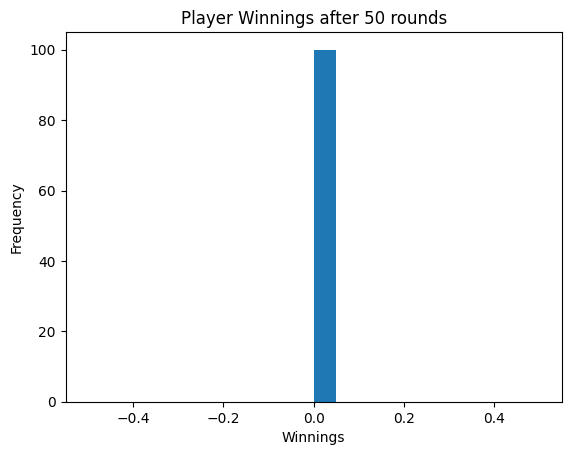

In [85]:
# Testing
if __name__ == "__main__":
    winnings=[]
    for game_num in range(100):
        game=Game()
        strategy_player=StrategyPlayer("Raseash",chips=100)
        game.add_player(strategy_player)
        player1=Player("Franklin",chips=100)
        player2=Player("Tony",chips=100)
        game.add_player(player1)
        game.add_player(player2)

        total_winnings=game.play(50)
        winnings.append(total_winnings)

    avg_winnings=np.mean(winnings)
    std_dev=np.std(winnings)
    prob_net_winning=np.sum(np.array(winnings)>0)/len(winnings)
    prob_net_losing=np.sum(np.array(winnings)<0)/len(winnings)

    print(f"Average winnings per round: {avg_winnings}")
    print(f"Standard deviation: {std_dev}")
    print(f"Probability of net winning: {prob_net_winning}")
    print(f"Probability of net losing: {prob_net_losing}")

    plt.hist(winnings,bins=20)
    plt.title("Player Winnings after 50 rounds")
    plt.xlabel("Winnings")
    plt.ylabel("Frequency")
    plt.show()

9. Repeat previous questions scanning the value of the threshold. Try at least 5 different threshold values. Can you find an optimal value?

In [90]:
import random
import matplotlib.pyplot as plt
import numpy as np

class Card:
    def __init__(self,suit,rank,value):
        self.suit=suit
        self.rank=rank
        self.value=value

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self,num_decks=6):
        self.num_decks=num_decks
        self.cards=[]
        self.create_deck()

    def create_deck(self):
        suits=['Clubs','Diamonds','Hearts','Spades']
        ranks=['2','3','4','5','6','7','8','9','10','J','Q','K','A']
        values={'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9,'10':10,'J':10,'Q':10,'K':10,'A':11}
        for _ in range(self.num_decks):
            for suit in suits:
                for rank in ranks:
                    self.cards.append(Card(suit,rank,values[rank]))
        self.cards.insert(random.randint(0,len(self.cards)-1),"Plastic Card")

    def shuffle(self):
        random.shuffle(self.cards)

    def draw(self):
        if len(self.cards)==0:
            print("Empty Deck, shuffling new deck.")
            self.create_deck()
        card=self.cards.pop()
        if card=="Plastic Card":
            print("Plastic Card, shuffling the deck.")
            self.shuffle()
            card=self.cards.pop()
        return card

class Hand:
    def __init__(self):
        self.cards=[]

    def add_card(self,card):
        self.cards.append(card)

    def remove_card(self,card):
        self.cards.remove(card)

    def calculate_value(self):
        total=sum(card.value for card in self.cards)
        ace_count=sum(1 for card in self.cards if card.rank=='A')
        while total>21 and ace_count:
            total-=10
            ace_count-=1
        return total

class Player:
    def __init__(self,name,chips=100):
        self.name=name
        self.chips=chips
        self.hand=Hand()
        self.busted=False

    def add_card(self,card):
        if not self.busted:
            self.hand.add_card(card)
            if self.calculate_hand_value()>21:
                self.busted=True
                print(f"{self.name} busted with a value of {self.calculate_hand_value()}")

    def remove_card(self,card):
        self.hand.remove_card(card)

    def calculate_hand_value(self):
        return self.hand.calculate_value()

    def is_busted(self):
        return self.busted

    def update_chips(self,winnings):
        self.chips+=winnings

class StrategyPlayer(Player):
    def __init__(self,name,chips=100,threshold=-2):
        super().__init__(name,chips)
        self.running_count=0
        self.threshold=threshold

    def update_running_count(self,card):
        if card.rank in ['2','3','4','5','6']:
            self.running_count+=1
        elif card.rank in ['10','J','Q','K','A']:
            self.running_count-=1

    def decision(self):
        if self.running_count<=self.threshold:
            return 'hit'
        return 'stay'

class Game:
    def __init__(self,verbose=False):
        self.players=[]
        self.deck=Deck()
        self.turn=0
        self.game_state="Game is still active."
        self.verbose=verbose

    def add_player(self,player):
        self.players.append(player)

    def start_game(self):
        self.game_state="Game is still active."
        for player in self.players:
            player.add_card(self.deck.draw())
            player.add_card(self.deck.draw())
        print(f"Game started with {len(self.players)} players.")

    def next_turn(self,player):
        if isinstance(player,StrategyPlayer):
            while player.decision()=='hit' and not player.is_busted():
                player.add_card(self.deck.draw())
                if self.verbose:
                    print(f"{player.name} hits with hand value {player.calculate_hand_value()}")
        else:
            while player.calculate_hand_value()<17 and not player.is_busted():
                player.add_card(self.deck.draw())
                if self.verbose:
                    print(f"{player.name} hits with hand value {player.calculate_hand_value()}")
        if self.verbose:
            print(f"{player.name} stays with hand value {player.calculate_hand_value()}")

    def dealer_turn(self):
        dealer=self.players[0]
        while dealer.calculate_hand_value()<17:
            dealer.add_card(self.deck.draw())
            if self.verbose:
                print(f"Dealer hits with hand value {dealer.calculate_hand_value()}")
        if self.verbose:
            print(f"Dealer stays with hand value {dealer.calculate_hand_value()}")

    def check_winner(self):
        dealer=self.players[0]
        winner=None
        highest_value=0
        for player in self.players[1:]:
            if player.is_busted():
                continue
            player_value=player.calculate_hand_value()
            if player_value>highest_value and player_value<=21:
                highest_value=player_value
                winner=player
        if winner:
            print(f"The winner is {winner.name} with a hand value of {highest_value}.")
        else:
            print("No winner, dealer wins.")

    def play_round(self):
        self.start_game()
        for player in self.players:
            self.next_turn(player)
        self.dealer_turn()
        self.check_winner()

    def play(self,num_rounds):
        total_strategy_player_winnings=0
        for _ in range(num_rounds):
            self.play_round()
            strategy_player=self.players[1]
            if strategy_player.is_busted():
                total_strategy_player_winnings-=1
            else:
                total_strategy_player_winnings+=1
            if strategy_player.busted:
                print(f"{strategy_player.name} is out of money.")
                break
        return total_strategy_player_winnings


Game started with 3 players!
The winner is Franklin with a hand value of 20.
Raseash busted with a value of 26
Franklin busted with a value of 26
Tony busted with a value of 23
Game started with 3 players!
No winner, dealer wins.
Franklin is out of money.
Game started with 3 players!
The winner is Franklin with a hand value of 20.
Raseash busted with a value of 26
Franklin busted with a value of 26
Tony busted with a value of 23
Game started with 3 players!
No winner, dealer wins.
Franklin is out of money.
Game started with 3 players!
The winner is Franklin with a hand value of 20.
Raseash busted with a value of 26
Franklin busted with a value of 26
Tony busted with a value of 23
Game started with 3 players!
No winner, dealer wins.
Franklin is out of money.
Game started with 3 players!
The winner is Franklin with a hand value of 20.
Raseash busted with a value of 26
Franklin busted with a value of 26
Tony busted with a value of 23
Game started with 3 players!
No winner, dealer wins.
Fr

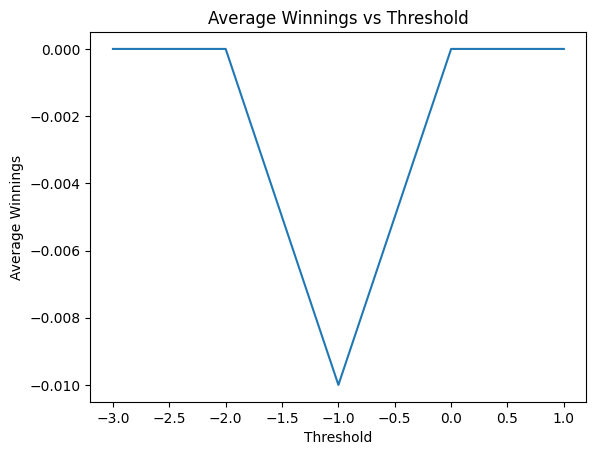

In [91]:
# Testing
if __name__ == "__main__":
    threshold_values=[-3, -2, -1, 0, 1]
    results={}

    for threshold in threshold_values:
        winnings=[]
        for game_num in range(100):
            game=Game()
            strategy_player=StrategyPlayer("Raseash",chips=100,threshold=threshold)
            game.add_player(strategy_player)
            player1=Player("Franklin",chips=100)
            player2=Player("Tony",chips=100)
            game.add_player(player1)
            game.add_player(player2)

            total_winnings=game.play(50)
            winnings.append(total_winnings)

        avg_winnings=np.mean(winnings)
        std_dev=np.std(winnings)
        prob_net_winning=np.sum(np.array(winnings)>0)/len(winnings)
        prob_net_losing=np.sum(np.array(winnings)<0)/len(winnings)

        results[threshold]={"Average Winnings": avg_winnings,
                            "Standard Deviation": std_dev,
                            "Probability Net Winning": prob_net_winning,
                            "Probability Net Losing": prob_net_losing}

    for threshold,result in results.items():
        print(f"Threshold: {threshold}")
        print(f"Average winnings per round: {result['Average Winnings']}")
        print(f"Standard deviation: {result['Standard Deviation']}")
        print(f"Probability of net winning: {result['Probability Net Winning']}")
        print(f"Probability of net losing: {result['Probability Net Losing']}")
        print("-" * 50)

    winnings=[result["Average Winnings"] for result in results.values()]
    plt.plot(threshold_values,winnings)
    plt.title("Average Winnings vs Threshold")
    plt.xlabel("Threshold")
    plt.ylabel("Average Winnings")
    plt.show()


10. Create a new strategy based on web searches or your own ideas. Demonstrate that the new strategy will result in increased or decreased winnings. 

In [96]:
class ConservativeStrategyPlayer(StrategyPlayer):
    def __init__(self,name,chips=100):
        super().__init__(name, chips)

    def decision(self):
        if self.calculate_hand_value()>=14:
            return 'stay'
        return 'hit'


Game started with 3 players!
The winner is Franklin with a hand value of 20.
Raseash busted with a value of 26
Franklin busted with a value of 26
Tony busted with a value of 23
Game started with 3 players!
No winner, dealer wins.
Franklin is out of money.
Game started with 3 players!
The winner is Franklin with a hand value of 20.
Raseash busted with a value of 26
Franklin busted with a value of 26
Tony busted with a value of 23
Game started with 3 players!
No winner, dealer wins.
Franklin is out of money.
Game started with 3 players!
The winner is Franklin with a hand value of 20.
Raseash busted with a value of 26
Franklin busted with a value of 26
Tony busted with a value of 23
Game started with 3 players!
No winner, dealer wins.
Franklin is out of money.
Game started with 3 players!
The winner is Franklin with a hand value of 20.
Raseash busted with a value of 26
Franklin busted with a value of 26
Tony busted with a value of 23
Game started with 3 players!
No winner, dealer wins.
Fr

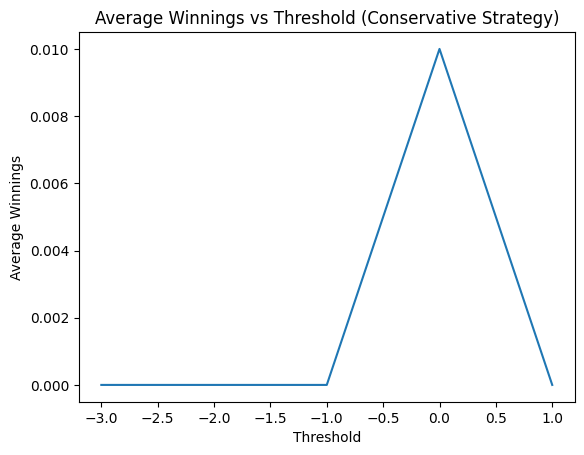

In [97]:
if __name__ == "__main__":
    threshold_values=[-3, -2, -1, 0, 1]
    results={}

    for threshold in threshold_values:
        winnings=[]
        for game_num in range(100):
            game=Game()
            conservative_player=ConservativeStrategyPlayer("Raseash", chips=100)
            game.add_player(conservative_player)
            player1=Player("Franklin", chips=100)
            player2=Player("Tony", chips=100)
            game.add_player(player1)
            game.add_player(player2)

            total_winnings=game.play(50)
            winnings.append(total_winnings)

        avg_winnings=np.mean(winnings)
        std_dev=np.std(winnings)
        prob_net_winning=np.sum(np.array(winnings)>0)/len(winnings)
        prob_net_losing=np.sum(np.array(winnings)<0)/len(winnings)

        results[threshold]={
            "Average Winnings": avg_winnings,
            "Standard Deviation": std_dev,
            "Probability Net Winning": prob_net_winning,
            "Probability Net Losing": prob_net_losing
        }

    for threshold, result in results.items():
        print(f"Threshold: {threshold}")
        print(f"Average winnings per round: {result['Average Winnings']}")
        print(f"Standard deviation: {result['Standard Deviation']}")
        print(f"Probability of net winning: {result['Probability Net Winning']}")
        print(f"Probability of net losing: {result['Probability Net Losing']}")
        print("-" * 50)

    winnings=[result['Average Winnings'] for result in results.values()]
    plt.plot(threshold_values, winnings)
    plt.title("Average Winnings vs Threshold (Conservative Strategy)")
    plt.xlabel("Threshold")
    plt.ylabel("Average Winnings")
    plt.show()
